In [7]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_df = pd.merge(clinical_trial_data, mouse_data, how="left", on=["Mouse ID"])


# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
timepoints = combined_df.groupby(['Drug',"Timepoint"], as_index= False)[['Tumor Volume (mm3)']].mean()
timepoints.head()
# Convert to DataFrame
#done
# Preview DataFrame
timepoints.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stdError = combined_df.groupby(['Drug', 'Timepoint'], as_index=False).agg({"Tumor Volume (mm3)": "sem"})
stdError['SEM'] = stdError["Tumor Volume (mm3)"]
stdError = stdError[["Drug", "Timepoint", "SEM"]]
#combined_df.groupby(['Drug',"Timepoint"], as_index = False)[['Tumor Volume (mm3)']].sem()
stdError.head()
# Convert to DataFrame

# Preview DataFrame
stdError.head()


,Drug,Timepoint,SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
# Minor Data Munging to Re-Format the Data Frames
reshaped = timepoints.pivot(index = 'Timepoint', columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
reshaped.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


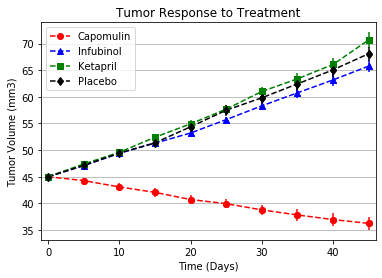

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate the Plot (with Error Bars)
#only show drugs of interest (Capomulin, Infubinol, Ketapril, and Placebo)
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
colors = ["red", "blue", "green", "black"]
marker = ["o", "^", "s", "d"]

#build plot
fig, ax = plt.subplots()
for rx in drugs:
    #makes the line graph
    reshaped.loc[:, rx].plot(label=rx, marker = marker[drugs.index(rx)], color = colors[drugs.index(rx)], linestyle='dashed') 
    
    #creates error bars
    for t in list(reshaped.index):
        x = t
        y = reshaped.loc[t, rx]
        yerr = stdError.loc[(stdError['Drug'] == rx) & (stdError['Timepoint'] == x),'SEM']
        ax.errorbar(x, y, yerr=yerr , marker=marker[drugs.index(rx)], color = colors[drugs.index(rx)])

#prettify the graph
ax.set_xlim(-1, max(timepoints['Timepoint']) + 1)
ax.grid(which='major', axis='y')
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title('Tumor Response to Treatment')

plt.legend()
plt.show()



# Save the Figure
plt.savefig('./tumorResponseToTreatment.png')


In [12]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metSites = combined_df.groupby(['Drug',"Timepoint"], as_index= False)[['Metastatic Sites']].mean()
metSites.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

stdErrorMetSite = combined_df.groupby(['Drug', 'Timepoint'], as_index=False).agg({"Metastatic Sites": "sem"})
stdErrorMetSite['SEM'] = stdErrorMetSite["Metastatic Sites"]
stdErrorMetSite = stdErrorMetSite[["Drug", "Timepoint", "SEM"]]

stdErrorMetSite.head()
# Convert to DataFrame

# Preview DataFrame

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [15]:
# Minor Data Munging to Re-Format the Data Frames
reshapedMetSites = metSites.pivot(index = 'Timepoint', columns = "Drug", values = "Metastatic Sites")
# Preview that Reformatting worked
reshapedMetSites.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


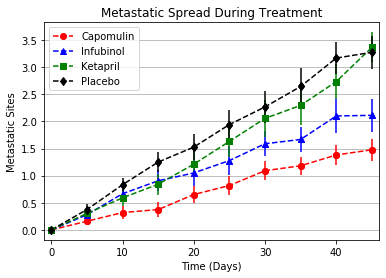

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate the Plot (with Error Bars)
#build plot
fig, ax = plt.subplots()
for rx in drugs:
    #makes the line graph
    reshapedMetSites.loc[:, rx].plot(label=rx, marker = marker[drugs.index(rx)], color = colors[drugs.index(rx)], linestyle='dashed') 
    
    #creates error bars
    for t in list(reshapedMetSites.index):
        x = t
        y = reshapedMetSites.loc[t, rx]
        yerr = stdErrorMetSite.loc[(stdErrorMetSite['Drug'] == rx) & (stdErrorMetSite['Timepoint'] == x),'SEM']
        ax.errorbar(x, y, yerr=yerr , marker=marker[drugs.index(rx)], color = colors[drugs.index(rx)])

#prettify the graph
ax.set_xlim(-1, max(timepoints['Timepoint']) + 1)
ax.grid(which='major', axis='y')
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Sites")
ax.set_title('Metastatic Spread During Treatment')

plt.legend()
plt.show()
# Save the Figure
plt.savefig('./spreadDuringTreatment.png')
# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouseCount = combined_df.groupby(['Drug',"Timepoint"], as_index= False)[['Mouse ID']].count()
mouseCount['Mouse Count'] = mouseCount["Mouse ID"]
mouseCount = mouseCount[["Drug", "Timepoint", "Mouse Count"]]
mouseCount.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames

reshapedMouseCount = mouseCount.pivot(index = 'Timepoint', columns = "Drug", values = "Mouse Count")
# Preview that Reformatting worked
reshapedMouseCount.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


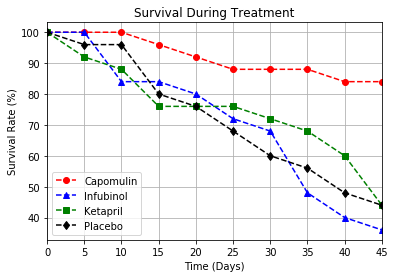

<Figure size 432x288 with 0 Axes>

In [19]:
for rx in drugs:
    #makes the line graph
    (reshapedMouseCount.loc[:, rx]/max(reshapedMouseCount.loc[:, rx])*100).plot(label=rx,
        marker = marker[drugs.index(rx)], 
        color = colors[drugs.index(rx)], linestyle='dashed',
        title = 'Survival During Treatment', 
        grid = True)

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend()
plt.show()
plt.savefig('./survivalCurve.png')

In [20]:
# Generate the Plot (Accounting for percentages)
for rx in drugs:
    #makes the line graph
    reshapedMetS.loc[:, rx].plot(label=rx, marker = marker[drugs.index(rx)], color = colors[drugs.index(rx)], linestyle='dashed') 
    
# Save the Figure

# Show the Figure
plt.show()

NameError: name 'reshapedMetS' is not defined

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
100*(list(reshaped['Capomulin'])[-1]-list(reshaped['Capomulin'])[0])/list(reshaped['Capomulin'])[0]

In [ ]:
# Calculate the percent changes for each drug
np.arange(len(xlabels))

In [ ]:
#data = {'Drugs': drugs, 'Tumor Pct Decrease': differences}
#summary_df = pd.DataFrame(data)
#for r in range(4):
 #   answer =  summary_df["Tumor Pct Decrease"][r] > 0
  #  print(answer)
tumor_change = (reshaped.loc[45, drugs] - reshaped.loc[0, drugs])/reshaped.loc[0, drugs] * 100
tumor_change

In [ ]:
#plot options
plt.title('Tumor Volume Change over 45 Day Treatment')
plt.ylabel('Survival Rate (%)')
plt.grid("major")
xlabels = tumor_change.index
#puts drug names as labels
plt.xticks(np.arange(len(xlabels)), xlabels, ha = "left")

#graphs % change of tumor as bar graph
plt.bar(np.arange(4), 
        tumor_change, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if tumor_change[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

#count for x coordinate location of value label
count = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for r in tumor_change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1
    
plt.show()
plt.savefig('./waterfallChangeInSize.png')

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

In [ ]:
'''Conclusions:
Mice treated with Capomulin expereinced reduced mean tumor size, reduced number of metastatic sites, and increased survival compared to a placbeo during the trial period.
Mice treated with Infubinol and Ketapril had no significant changes in outcomes compared to a placebo.
Metastatic spread was observed in all treatment groups, which suggests that while Capomulin may increase cancer survival in mice, it is not a cure.'''

![Metastatic Spread During Treatment](../Images/change.png)